###Topic: Challenge Set 6
###Subject: Regression simulations
###Date: 01/28/2017
###Name: Subramanian Iyer
###Worked with: Worked Individually

In [88]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

###**Challenge 1**

In [89]:
def f(x, k, c):
    return c + (k * np.log(x))
np.random.seed(4444)
multiplier = 6
constant = 140
n_samples = 1001
X = np.random.uniform(0, 1050, size=n_samples)[:, np.newaxis]
y = f(X, multiplier, constant) + np.random.normal(scale=2, size=n_samples)[:, np.newaxis]

In [90]:
mquad = make_pipeline(PolynomialFeatures(2), LinearRegression())
mquad.fit(X, y)
mlog = LinearRegression()
mlog.fit(np.log(X), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0,0.5,'predicted values')

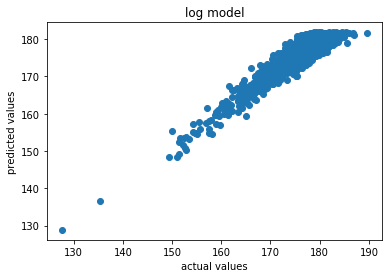

In [91]:
logpred = mlog.predict(np.log(X))
quadpred = mquad.predict(X)
plt.scatter(y, logpred)
plt.title('log model')
plt.xlabel('actual values')
plt.ylabel('predicted values')

Text(0,0.5,'predicted values')

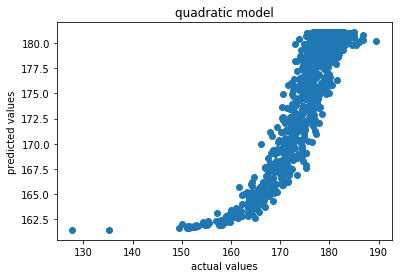

In [92]:
plt.scatter(y, quadpred)
plt.title('quadratic model')
plt.xlabel('actual values')
plt.ylabel('predicted values')

Text(0,0.5,'frequency')

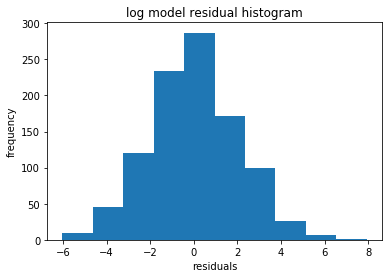

In [93]:
plt.hist(y-logpred)
plt.title('log model residual histogram')
plt.xlabel('residuals')
plt.ylabel('frequency')

Text(0,0.5,'frequency')

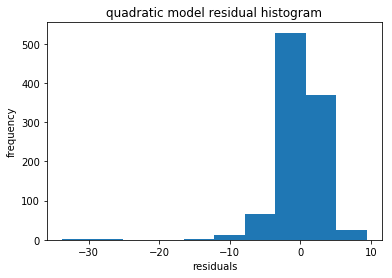

In [94]:
plt.hist(y-quadpred)
plt.title('quadratic model residual histogram')
plt.xlabel('residuals')
plt.ylabel('frequency')

###**Challenge 2**

In [95]:
def g(x, b0, b1, b2):
    return b0 + (b1 * x) + (b2 * np.power(x, 2))
np.random.seed(4444)
b0 = 5
b1 = 3
b2 = 1
n_samples = 103
X = np.random.uniform(0, 50, size=n_samples)[:, np.newaxis]
y = g(X, b0, b1, b2) + np.random.normal(scale=6, size=n_samples)[:, np.newaxis]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
est = make_pipeline(PolynomialFeatures(2), LinearRegression())
est.fit(X_train, y_train)
print(mean_squared_error(y_train, est.predict(X_train)))
print(mean_squared_error(y_test, est.predict(X_test)))

35.1338131634
37.0806721973


###**Challenge 3**

Text(0.5,1,'Train MSE vs degree')

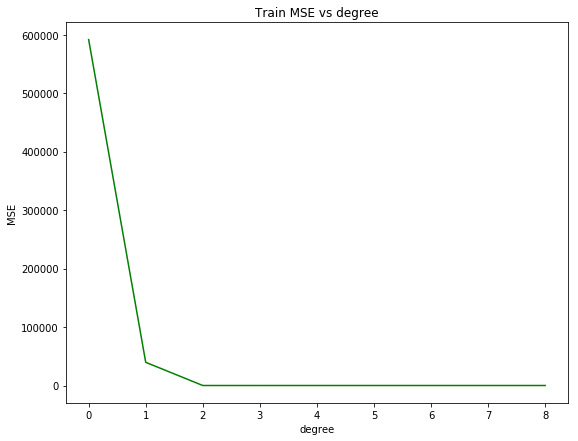

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
degrees = [i for i in range(9)]
train_error = np.empty(9)
test_error = np.empty(9)
r2 = np.empty(9)
AIC = np.empty(9)
for degree in degrees:
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))
    r2[degree]= est.score(X_test, y_test)
    AIC[degree] = len(y_test) * np.log(test_error[degree]) + (2*degree)
plt.figure(figsize=(9,7))
plt.plot(np.arange(9), train_error, color='green', label='train MSE')

#plt.plot(np.arange(9), r2, color = 'blue', label = 'test r^2')
#plt.plot(np.arange(9), AIC, color = 'black', label = 'AIC')
plt.ylabel('MSE')
plt.xlabel('degree')
plt.title('Train MSE vs degree')

Text(0.5,1,'Test MSE vs degree')

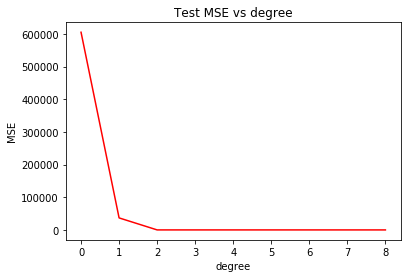

In [98]:
plt.plot(np.arange(9), test_error, color='red', label='test MSE')
plt.ylabel('MSE')
plt.xlabel('degree')
plt.title('Test MSE vs degree')

Text(0.5,1,'Test r^2 vs degree')

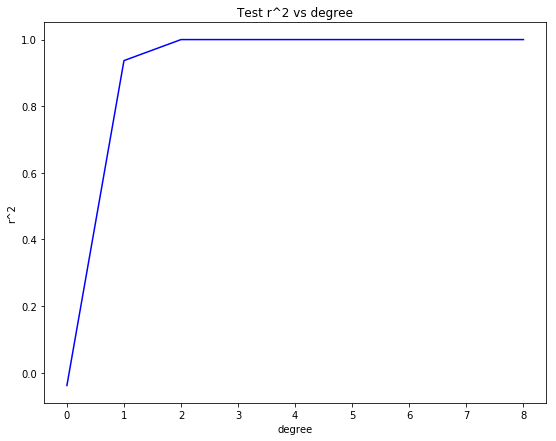

In [99]:
plt.figure(figsize=(9,7))
plt.plot(np.arange(9), r2, color = 'blue', label = 'test r^2')
#plt.plot(np.arange(9), AIC, color = 'black', label = 'AIC')
plt.ylabel('r^2')
plt.xlabel('degree')
#plt.legend(loc='upper left')
plt.title('Test r^2 vs degree')

Text(0.5,1,'AIC vs degree')

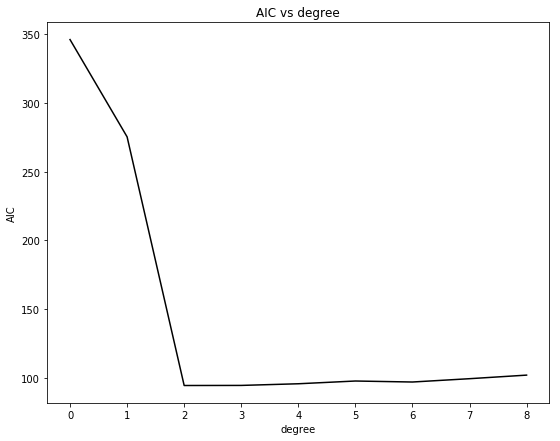

In [100]:
plt.figure(figsize=(9,7))
plt.plot(np.arange(9), AIC, color = 'black', label = 'AIC')
plt.ylabel('AIC')
plt.xlabel('degree')
#plt.legend(loc='upper left')
plt.title('AIC vs degree')

###**Challenge 4**

Text(0.5,1,'Test and Train MSE vs degree')

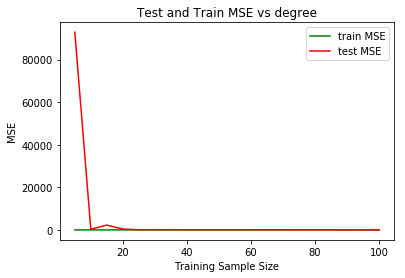

In [101]:
testE = []
trainE = []
eyes = []
for i in range(5, len(X), 5):
    trainX = X[0:i]
    trainY = y[0:i]
    testX = X[i+1:]
    testY = y[i+1:]
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(trainX, trainY)
    trainE.append(mean_squared_error(trainY, est.predict(trainX)))
    testE.append(mean_squared_error(testY, est.predict(testX)))
    eyes.append(i)
plt.plot(eyes, trainE, color='green', label='train MSE')
plt.plot(eyes, testE, color='red', label='test MSE')
plt.ylabel('MSE')
plt.xlabel('Training Sample Size')
plt.legend(loc='upper right')
plt.title('Test and Train MSE vs degree')